In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import seaborn as sns

In [10]:
mud_df = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/Mud.csv')
print(mud_df)

        Date/Time    Date TideID VegID  PlotID  PairID   Seq SVCseq  665pre  \
0   9/29/20 13:18  29-Sep    Ebb    JR     1.0     1.0   1.0      2   0.082   
1   9/29/20 13:24  29-Sep    Ebb    JR     2.0     2.0   2.0      3   0.120   
2   9/29/20 13:33  29-Sep    Ebb    JR     3.0     3.0   3.0      7   0.142   
3   9/29/20 13:37  29-Sep    Ebb    JR     4.0     4.0   4.0      8   0.111   
4   9/29/20 13:42  29-Sep    Ebb    JR     5.0     5.0   5.0      9   0.210   
..            ...     ...    ...   ...     ...     ...   ...    ...     ...   
73        3/22/21  22-Mar  Flood    SS     4.0     NaN  19.0    NaN   0.105   
74        3/22/21  22-Mar  Flood    SS     5.0     NaN  20.0    NaN   0.114   
75            NaN     NaN    NaN   NaN     NaN     NaN   NaN    NaN     NaN   
76            NaN     NaN    NaN   NaN     NaN     NaN   NaN    NaN     NaN   
77            NaN     NaN    NaN   NaN     NaN     NaN   NaN    NaN     NaN   

    665post  ...  BenthoConc  Reflection   Latitude

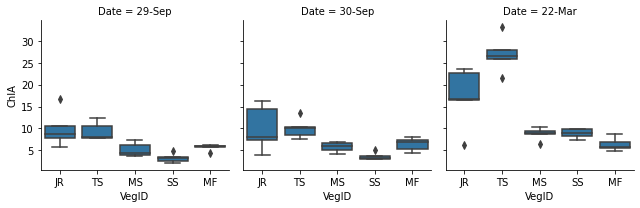

In [5]:
veg_plot = sns.FacetGrid(mud_df, col="Date", sharex=False)
veg_plot.map(sns.boxplot, 'VegID', 'ChlA', order=["JR", "TS", "MS", "SS", "MF"])
#veg_plot.savefig("chl.png", bbox_inches = 'tight')

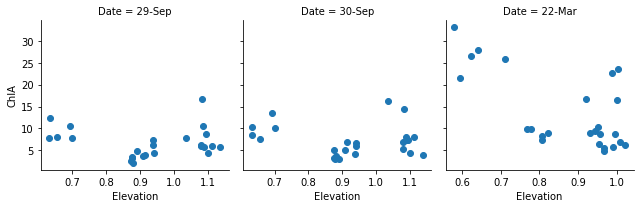

In [11]:
g = sns.FacetGrid(mud_df, col="Date",  sharex=False)
g = g.map(plt.scatter, 'Elevation', 'ChlA')

<AxesSubplot:xlabel='Elevation', ylabel='ChlA'>

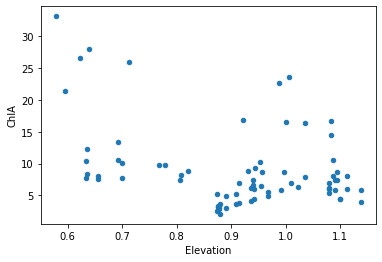

In [12]:
g_g = mud_df.plot(kind = 'scatter', x = 'Elevation', y = 'ChlA')
g_g